### Q1. Perform Exploratory Data Analysis (EDA) tasks

<br>a) Visualize the 10 random rows of the data set
<br>b) Generate the description for numeric variables
<br>c) Check the shape of the data set
<br>d) Generate the correlation matrix
<br>e) Generate a correlogram

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)
#plt.rcParams.update({"font.size":15, "axes.visible": False})
#plt.style.use("dark_background")

In [2]:
df=pd.read_csv("admission.csv")

In [3]:
df.sample(10)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
162,163,318,109,3,3.0,3.0,8.50,0,0.67
476,477,304,104,3,2.5,2.0,8.12,0,0.62
401,402,315,105,2,3.0,3.0,8.34,0,0.66
371,372,324,110,3,3.5,3.0,9.22,1,0.89
411,412,313,94,2,2.5,1.5,8.13,0,0.56
121,122,334,119,5,4.5,4.5,9.48,1,0.94
271,272,299,96,2,1.5,2.0,7.86,0,0.54
422,423,322,112,4,3.5,2.5,9.02,1,0.73
118,119,296,99,2,3.0,3.5,7.28,0,0.47
132,133,309,105,5,3.5,3.5,8.56,0,0.71


In [4]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [5]:
df.shape

(500, 9)

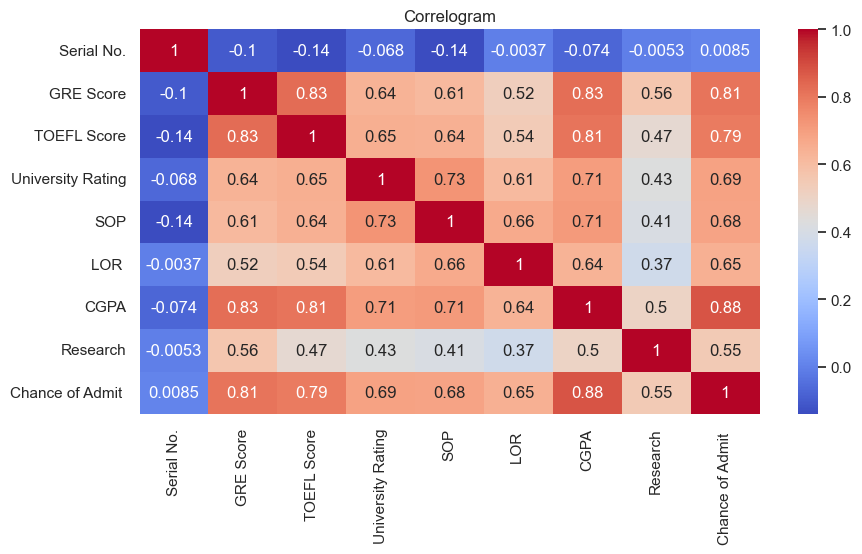

In [6]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True, fmt=".2g", cmap="coolwarm")
plt.title("Correlogram")
plt.show()

### Q.2 Find out the minimum and maximum values for GRE score


In [7]:
print("maximum:", max(df["GRE Score"]))
print("minimum:", min(df["GRE Score"]))

maximum: 340
minimum: 290


### Q.3 Find out the percentage of universities for each university rating

In [8]:
df["University Rating"].value_counts(normalize=True)*100

3    32.4
2    25.2
4    21.0
5    14.6
1     6.8
Name: University Rating, dtype: float64

### Q.4 Convert the target variable “Chance of Admit” to categorical having values 0 and 1,such that :
<br>Students having the “Chance of Admit” value &gt; 0.80, are assigned value 1, and
<br>Students having the “Chance of Admit” value &lt; 0.80, are assigned value 0
<br>Where 0: Low chance of Admission and 1: High chance of admission

In [9]:
df["Chance of Admit "]=np.where(df["Chance of Admit "]>=0.80,1,0)

### Q.5 Build a Decision Tree classifier, to predict whether a student has a low or high chance of admission to a chosen university. Perform Hyperparameter Tuning to improve the accuracy of the model.

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [11]:
df.isnull().sum()
## No null values

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [12]:
df.duplicated().sum() ## There are no duplicates in the dataset

0

In [13]:
## Dropping Serial No. column as it is irrelevant for our analysis
df.drop(columns=["Serial No."], inplace=True)

In [14]:
X=df.drop(columns=["Chance of Admit "])

In [15]:
Y=df[["Chance of Admit "]]

In [16]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3)

In [17]:
dtc=DecisionTreeClassifier()

In [18]:
dtc.fit(X_train,Y_train)

DecisionTreeClassifier()

In [19]:
print("Train Score",dtc.score(X_train,Y_train))
print("Test Score", dtc.score(X_test,Y_test))

Train Score 1.0
Test Score 0.92


In [20]:
## It is leading to overfitting. We can do pruning and tune the hyperparameters
for i in range(1,100):
    dtc=DecisionTreeClassifier(max_depth=i,criterion="entropy")
    dtc.fit(X_train,Y_train)
    if (dtc.score(X_train,Y_train)>0.70) & (dtc.score(X_test,Y_test)>0.70):
        print("Train Score",dtc.score(X_train,Y_train))
        print("Test Score", dtc.score(X_test,Y_test))
        print(i)
## we're getting best score at max_depth=3 and there is no overfitting

Train Score 0.9171428571428571
Test Score 0.9266666666666666
1
Train Score 0.9171428571428571
Test Score 0.9266666666666666
2
Train Score 0.9257142857142857
Test Score 0.92
3
Train Score 0.9428571428571428
Test Score 0.8933333333333333
4
Train Score 0.9542857142857143
Test Score 0.9066666666666666
5
Train Score 0.9628571428571429
Test Score 0.9066666666666666
6
Train Score 0.9771428571428571
Test Score 0.8933333333333333
7
Train Score 0.9828571428571429
Test Score 0.8866666666666667
8
Train Score 0.9914285714285714
Test Score 0.8933333333333333
9
Train Score 1.0
Test Score 0.8866666666666667
10
Train Score 1.0
Test Score 0.8866666666666667
11
Train Score 1.0
Test Score 0.8866666666666667
12
Train Score 1.0
Test Score 0.8933333333333333
13
Train Score 1.0
Test Score 0.8866666666666667
14
Train Score 1.0
Test Score 0.8933333333333333
15
Train Score 1.0
Test Score 0.8866666666666667
16
Train Score 1.0
Test Score 0.8866666666666667
17
Train Score 1.0
Test Score 0.8866666666666667
18
Train 

In [21]:
## Updating the model with hyperparameters parameters
dtc=DecisionTreeClassifier(max_depth=3,criterion="entropy")
dtc.fit(X_train,Y_train)
print("Train Score",dtc.score(X_train,Y_train))
print("Test Score", dtc.score(X_test,Y_test))

Train Score 0.9257142857142857
Test Score 0.92


In [22]:
## Trying to improve the model with bagging, bossting, and random forest

In [23]:
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier, AdaBoostClassifier,RandomForestClassifier
import xgboost

### Applying Bagging

In [24]:
bgc=BaggingClassifier(estimator=dtc,n_estimators=15)
bgc.fit(X_train,Y_train)
print("Train Score",bgc.score(X_train,Y_train))
print("Test Score", bgc.score(X_test,Y_test))

Train Score 0.94
Test Score 0.9266666666666666


### Applying boosting

In [25]:
adb=AdaBoostClassifier(estimator=dtc,n_estimators=80)
adb.fit(X_train,Y_train)
print("Train Score",adb.score(X_train,Y_train))
print("Test Score", adb.score(X_test,Y_test))

Train Score 1.0
Test Score 0.8866666666666667


In [26]:
for i in range(1,100):
    adb=AdaBoostClassifier(estimator=dtc,n_estimators=i)
    adb.fit(X_train,Y_train)
    if (adb.score(X_train,Y_train)>0.90) & (adb.score(X_test,Y_test)>0.90):
        print("Train Score",adb.score(X_train,Y_train))
        print("Test Score", adb.score(X_test,Y_test))
        print(i)
## Not giving good results

Train Score 0.9257142857142857
Test Score 0.92
1
Train Score 0.9314285714285714
Test Score 0.92
2
Train Score 0.9628571428571429
Test Score 0.92
3
Train Score 0.9742857142857143
Test Score 0.92
4
Train Score 0.9971428571428571
Test Score 0.9133333333333333
6
Train Score 0.9971428571428571
Test Score 0.9133333333333333
7
Train Score 1.0
Test Score 0.9333333333333333
8
Train Score 1.0
Test Score 0.9266666666666666
9
Train Score 1.0
Test Score 0.9066666666666666
10
Train Score 1.0
Test Score 0.9066666666666666
26
Train Score 1.0
Test Score 0.9066666666666666
27
Train Score 1.0
Test Score 0.9066666666666666
30
Train Score 1.0
Test Score 0.9066666666666666
32
Train Score 1.0
Test Score 0.9066666666666666
33
Train Score 1.0
Test Score 0.9066666666666666
39
Train Score 1.0
Test Score 0.9133333333333333
40
Train Score 1.0
Test Score 0.9066666666666666
41
Train Score 1.0
Test Score 0.9066666666666666
42
Train Score 1.0
Test Score 0.9066666666666666
44
Train Score 1.0
Test Score 0.90666666666666

In [27]:
gdb=GradientBoostingClassifier(n_estimators=100)
gdb.fit(X_train,Y_train)
print("Train Score",gdb.score(X_train,Y_train))
print("Test Score", gdb.score(X_test,Y_test))

Train Score 1.0
Test Score 0.9066666666666666


In [28]:
for i in range(1,200):
    gdb=GradientBoostingClassifier(n_estimators=i)
    gdb.fit(X_train,Y_train)
    if (gdb.score(X_train,Y_train)>0.90) & (gdb.score(X_test,Y_test)>0.90):
        print("Train Score",gdb.score(X_train,Y_train))
        print("Test Score", gdb.score(X_test,Y_test))
        print(i)
## At n_estimators=67, Train Score 0.9885714285714285, Test Score 0.9333333333333333
## At n_estimators=30, Train Score 0.0.9571428571428572, Test Score 0.9133333333333333


Train Score 0.92
Test Score 0.9133333333333333
4
Train Score 0.92
Test Score 0.9133333333333333
5
Train Score 0.9314285714285714
Test Score 0.9066666666666666
6
Train Score 0.9371428571428572
Test Score 0.92
7
Train Score 0.9514285714285714
Test Score 0.9133333333333333
8
Train Score 0.9571428571428572
Test Score 0.9133333333333333
9
Train Score 0.9542857142857143
Test Score 0.9133333333333333
10
Train Score 0.9571428571428572
Test Score 0.9133333333333333
11
Train Score 0.9571428571428572
Test Score 0.9133333333333333
12
Train Score 0.9571428571428572
Test Score 0.9133333333333333
13
Train Score 0.9571428571428572
Test Score 0.9133333333333333
14
Train Score 0.9571428571428572
Test Score 0.9133333333333333
15
Train Score 0.9571428571428572
Test Score 0.9133333333333333
16
Train Score 0.9542857142857143
Test Score 0.9133333333333333
17
Train Score 0.9571428571428572
Test Score 0.9133333333333333
18
Train Score 0.9542857142857143
Test Score 0.92
19
Train Score 0.9542857142857143
Test Sc

Train Score 1.0
Test Score 0.9066666666666666
153
Train Score 1.0
Test Score 0.9066666666666666
154
Train Score 1.0
Test Score 0.9066666666666666
155
Train Score 1.0
Test Score 0.9066666666666666
156
Train Score 1.0
Test Score 0.9066666666666666
157
Train Score 1.0
Test Score 0.9066666666666666
158
Train Score 1.0
Test Score 0.9066666666666666
159
Train Score 1.0
Test Score 0.9066666666666666
160
Train Score 1.0
Test Score 0.9066666666666666
161
Train Score 1.0
Test Score 0.9066666666666666
162
Train Score 1.0
Test Score 0.9066666666666666
163
Train Score 1.0
Test Score 0.9066666666666666
164
Train Score 1.0
Test Score 0.9066666666666666
165
Train Score 1.0
Test Score 0.9066666666666666
166
Train Score 1.0
Test Score 0.9066666666666666
167
Train Score 1.0
Test Score 0.9066666666666666
168
Train Score 1.0
Test Score 0.9066666666666666
169
Train Score 1.0
Test Score 0.9066666666666666
170
Train Score 1.0
Test Score 0.9066666666666666
171
Train Score 1.0
Test Score 0.9066666666666666
172


In [29]:
xgb=xgboost.XGBClassifier(n_estimators=100)
xgb.fit(X_train,Y_train)
print("Train Score",xgb.score(X_train,Y_train))
print("Test Score", xgb.score(X_test,Y_test))

Train Score 0.9971428571428571
Test Score 0.9066666666666666


In [30]:
for i in range(1,200):
    xgb=xgboost.XGBClassifier(n_estimators=i)
    xgb.fit(X_train,Y_train)
    if (xgb.score(X_train,Y_train)>0.90) & (xgb.score(X_test,Y_test)>0.90):
        print("Train Score",xgb.score(X_train,Y_train))
        print("Test Score", xgb.score(X_test,Y_test))
        print(i)
        ## Not giving improved score

Train Score 0.92
Test Score 0.9133333333333333
1
Train Score 0.9285714285714286
Test Score 0.9266666666666666
2
Train Score 0.9571428571428572
Test Score 0.9266666666666666
3
Train Score 0.9657142857142857
Test Score 0.9266666666666666
4
Train Score 0.9714285714285714
Test Score 0.9266666666666666
5
Train Score 0.9828571428571429
Test Score 0.92
6
Train Score 0.98
Test Score 0.92
7
Train Score 0.9828571428571429
Test Score 0.92
8
Train Score 0.98
Test Score 0.92
9
Train Score 0.9828571428571429
Test Score 0.92
10
Train Score 0.9828571428571429
Test Score 0.92
11
Train Score 0.9857142857142858
Test Score 0.92
12
Train Score 0.9857142857142858
Test Score 0.92
13
Train Score 0.9885714285714285
Test Score 0.9266666666666666
14
Train Score 0.9885714285714285
Test Score 0.92
15
Train Score 0.9885714285714285
Test Score 0.9266666666666666
16
Train Score 0.9885714285714285
Test Score 0.9266666666666666
17
Train Score 0.9885714285714285
Test Score 0.92
18
Train Score 0.9885714285714285
Test Sco

Train Score 0.9971428571428571
Test Score 0.9066666666666666
135
Train Score 0.9971428571428571
Test Score 0.9066666666666666
136
Train Score 0.9971428571428571
Test Score 0.9066666666666666
137
Train Score 0.9971428571428571
Test Score 0.9066666666666666
138
Train Score 0.9971428571428571
Test Score 0.9066666666666666
139
Train Score 0.9971428571428571
Test Score 0.9066666666666666
140
Train Score 0.9971428571428571
Test Score 0.9066666666666666
141
Train Score 0.9971428571428571
Test Score 0.9066666666666666
142
Train Score 0.9971428571428571
Test Score 0.9066666666666666
143
Train Score 0.9971428571428571
Test Score 0.9066666666666666
144
Train Score 0.9971428571428571
Test Score 0.9066666666666666
145
Train Score 0.9971428571428571
Test Score 0.9066666666666666
146
Train Score 0.9971428571428571
Test Score 0.9066666666666666
147
Train Score 0.9971428571428571
Test Score 0.9066666666666666
148
Train Score 0.9971428571428571
Test Score 0.9066666666666666
149
Train Score 0.99714285714

### Random Forest

In [31]:
rfc=RandomForestClassifier(max_features=7,n_estimators=150)
rfc.fit(X_train,Y_train)
print("Train Score",rfc.score(X_train,Y_train))
print("Test Score", rfc.score(X_test,Y_test))

Train Score 1.0
Test Score 0.92


In [32]:
for i in range(1,200):
    rfc=RandomForestClassifier(max_features=7,n_estimators=i)
    rfc.fit(X_train,Y_train)
    if (rfc.score(X_train,Y_train)>0.90) & (rfc.score(X_test,Y_test)>0.90):
        print("Train Score",rfc.score(X_train,Y_train))
        print("Test Score", rfc.score(X_test,Y_test))
        print(i)
## not getting imporoved score

Train Score 0.9514285714285714
Test Score 0.9066666666666666
2
Train Score 0.9771428571428571
Test Score 0.92
4
Train Score 0.9885714285714285
Test Score 0.9066666666666666
6
Train Score 0.9857142857142858
Test Score 0.9066666666666666
7
Train Score 0.9885714285714285
Test Score 0.9066666666666666
8
Train Score 0.9971428571428571
Test Score 0.9266666666666666
9
Train Score 0.9942857142857143
Test Score 0.9066666666666666
10
Train Score 0.9942857142857143
Test Score 0.9066666666666666
11
Train Score 1.0
Test Score 0.9066666666666666
13
Train Score 0.9942857142857143
Test Score 0.9266666666666666
14
Train Score 0.9971428571428571
Test Score 0.9066666666666666
15
Train Score 0.9971428571428571
Test Score 0.9133333333333333
16
Train Score 1.0
Test Score 0.92
17
Train Score 0.9971428571428571
Test Score 0.92
18
Train Score 0.9971428571428571
Test Score 0.9066666666666666
19
Train Score 1.0
Test Score 0.9266666666666666
20
Train Score 0.9942857142857143
Test Score 0.9266666666666666
21
Train

Train Score 1.0
Test Score 0.92
185
Train Score 1.0
Test Score 0.92
186
Train Score 1.0
Test Score 0.9266666666666666
187
Train Score 1.0
Test Score 0.92
188
Train Score 1.0
Test Score 0.9266666666666666
189
Train Score 1.0
Test Score 0.92
190
Train Score 1.0
Test Score 0.9133333333333333
191
Train Score 1.0
Test Score 0.9333333333333333
192
Train Score 1.0
Test Score 0.9133333333333333
193
Train Score 1.0
Test Score 0.9266666666666666
194
Train Score 1.0
Test Score 0.9266666666666666
195
Train Score 1.0
Test Score 0.9333333333333333
196
Train Score 1.0
Test Score 0.9266666666666666
197
Train Score 1.0
Test Score 0.9266666666666666
198
Train Score 1.0
Test Score 0.9266666666666666
199


In [33]:
# Got below scores
## From Bagging: Train Score 0.9342857142857143, Test Score 0.92

## From Gradient Boosting
#### At n_estimators=67, Train Score 0.9885714285714285, Test Score 0.9333333333333333
#### At n_estimators=30, Train Score 0.0.9571428571428572, Test Score 0.9133333333333333

## We will go ahead with bagging model at n_estimators=15

In [35]:
print(bgc.score(X_train,Y_train))
print (bgc.score(X_test,Y_test))

0.94
0.9266666666666666


In [36]:
## Creating Confusion Matrix and classification report
from sklearn import metrics

In [37]:
y_predict=bgc.predict(X_test)

In [39]:
print(metrics.classification_report(Y_test,y_predict))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       106
           1       0.88      0.86      0.87        44

    accuracy                           0.93       150
   macro avg       0.91      0.91      0.91       150
weighted avg       0.93      0.93      0.93       150



<Axes: >

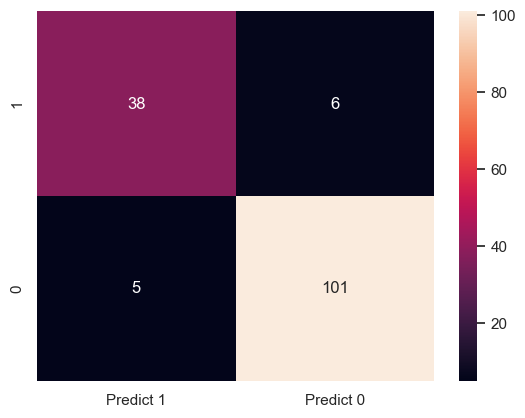

In [43]:
cm=metrics.confusion_matrix(Y_test,y_predict, labels=[1,0])
df_cm=pd.DataFrame(cm,columns=[i for i in ["Predict 1","Predict 0"]], index=[i for i in ["1","0"]] )
sns.heatmap(df_cm, annot=True,fmt="g")